# Lab 2
Diego McHenry & Julia Gelfond...February 12, 2024

Introduction: In Lab 2 we measure the distance dependence of electric potential.

Set up:

Part 1: The foundation of our set up consists of a tub with a laminated sheet with concentric circles. It was filled with a shallow layer of ionized water to act as our median for the voltage to travel. We then centered a metal ring on the circles. Additionally, we clamped a metal rod in such a way that its tip was also centered in the circles. The clamp had rubber gloves to insulate. We applied a voltage to the metal rod by inserting the red wired electrode and grounded the metal ring by inserting the black wired electrode. We were able to measure the voltage by using a sensor shown in the first picture. We read the sensors measurements using the device labeled in image 2. Note, the water was not allowed to flow over the ring.

Image 1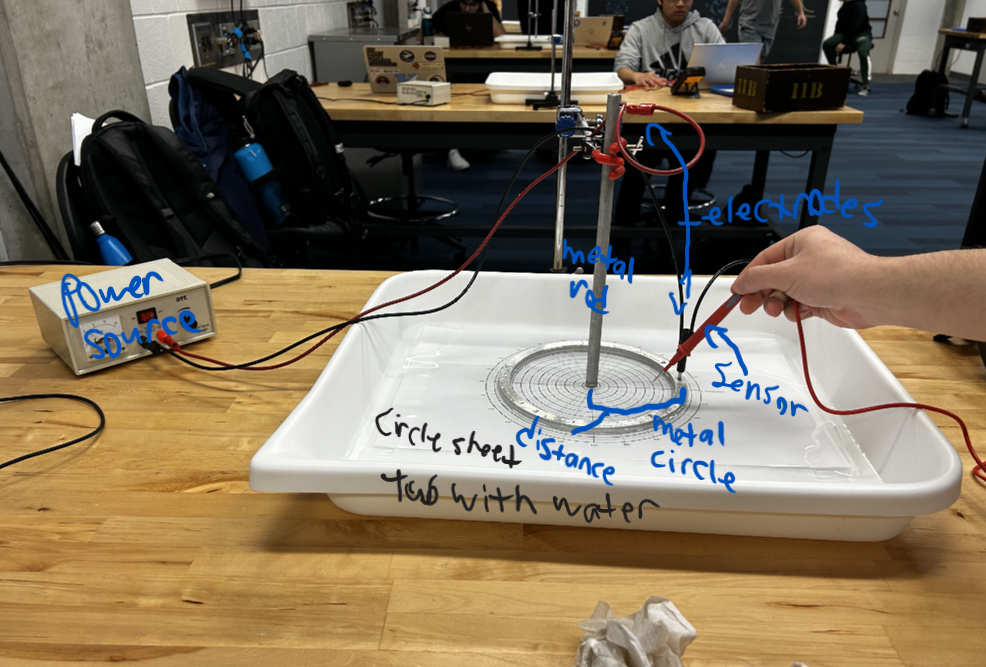

Part 2: The set up is similar except instead of using a metal rod and circle we use various pieces to make the shape of a face. Because we had so many pieces, we used electrode extendors so we could connect all the pieces to the electrodes, however, they were all black which is confusing: 3 were positively charged and 3 were grounded which isnt immediately apparent due to the large quantity of black wires. Finally, our laminated sheet in the second part features a grid which is good because in part two we collect data for the magnitude of a vector field at various points in the 2D field. The grid allowed us to ensure accurate and consistent spacing to make an accurate field map.
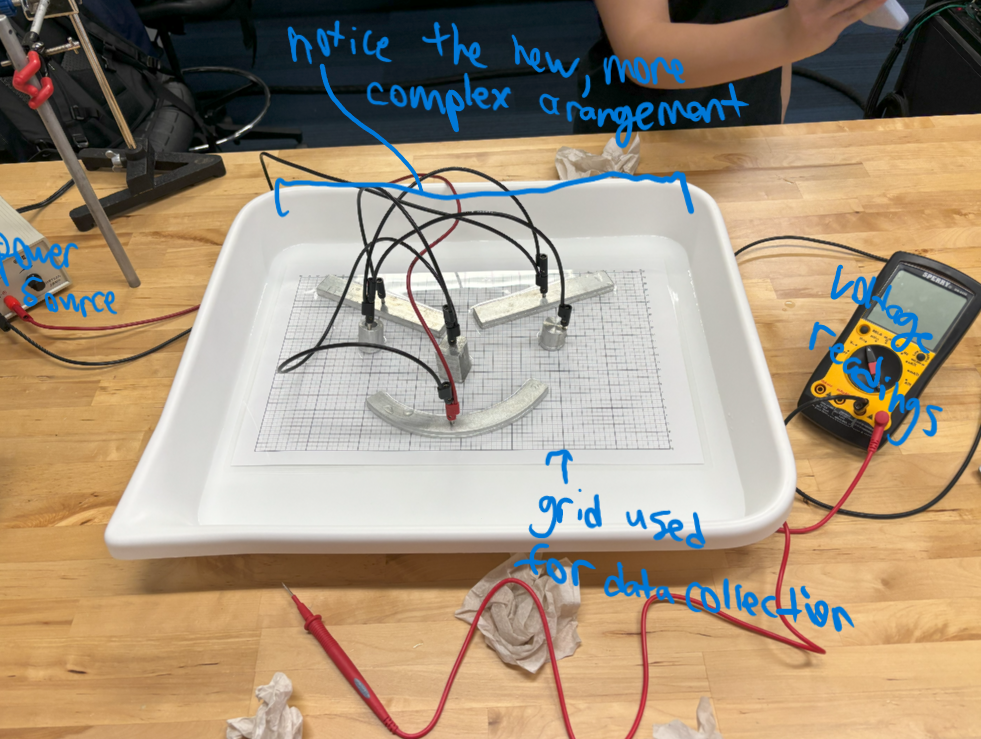


In [1]:
#importing all potentioally necessary mods
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import scipy.optimize as opt


Data collection Part1:

Using the part one set up, we measured the voltage in the water at various distances from the metal rod source. From here, we just need to analyze the data.

Analysis: The analysis will consist of the organization and manipulation of data to analyze the relationship between distance and voltage.

In [2]:
#ring data from excel
ringv = pd.read_excel("electrode1.xlsx")

With our data and error margins established we can model our function and then graph. The graph will include the data points, the model line, and error bars to get a visual of whats going on. Our model will give us a mathematical explanation. 

First lets generate the model equation.

In [3]:
#Define a model to determine the values for our equation
def linmodel(x, a, b):
    y = a*np.log(x)+b
    return y
fit_param, fit_param_errors = opt.curve_fit( linmodel, ringv['Distance (m)'],
ringv['Voltage (V)'],
sigma=ringv['dVoltage (V)'],
absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])
# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])
#here are our values
print(f'{fitA:.2f}, {fitdA:.2f}')
print(f'{fitB:.2f}, {fitdB:.2f}')

-0.96, 0.01
-0.77, 0.03


The model is complete so we can move on to generating the plot.

Text(0.5, 1.0, 'Distance dependence of Electric Potential')

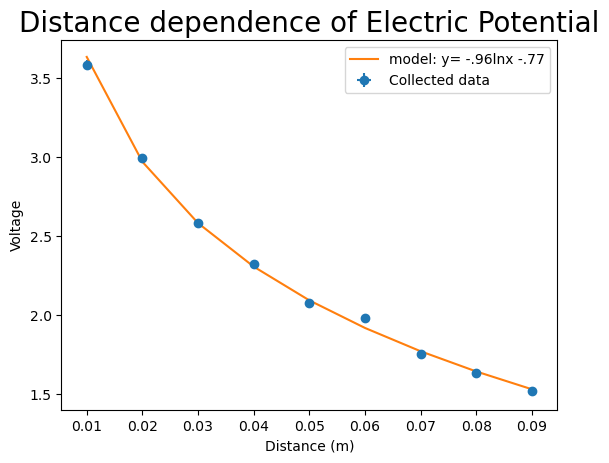

In [4]:
#graph the data and model to get a visual
plt.errorbar(ringv['Distance (m)'], ringv['Voltage (V)'], xerr=ringv['dDistance (m)'], yerr=ringv['dVoltage (V)'],
fmt="o", label='Collected data')
plt.plot(ringv['Distance (m)'], linmodel(ringv['Distance (m)'],
fitA, fitB), label='model: y= -.96lnx -.77')
#make it pretty :)
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Voltage')
plt.title('Distance dependence of Electric Potential', fontsize = 20)

Our uncertainty for each distance measurement was .0005 meters or .05cm. This reflects our confidence in the distance measurement as it was easy to get pretty precise measurements. The voltage uncertainty was calculated using the guide for our measurement device: +/- .8% + 1dgt.

Part 1 Results and Error:

V=-.96 * ln(d) - .77 Where V is voltage and d is distance in meters

V=-.96[+/-.01] * ln(d) - .77[+/-.03] (including error)

Our results closely follow our theoretical prediction: our logarithmic function should have a coeficient of -1. This closely aligns with our -.96; the percent error is only 4%. There are no glaring sources of error other than ones previously mentioned such as marginal uncertainties in distance measurements and voltage; of the two, distance is the dominant source as my hands are only so still, and the precision of our measuring devices were not as great for distance as compared to voltage. It should also be noted that the voltages we measured were lower than expected as the measurements directly on the charged pole were significantly below the expected 5.

Overall our result does make sense. If we think about it in terms of flux and surface area, the flux will remain constant because the charge enclosed remains the unchanged, but the area (or in this case circumference) does change. The change in circumference is inversely proportional to circumference and so is, therefore, the Electric field. Fundamentally, the Potential or volatage is the negative integral of the electric field. The integral of 1/x is lnx, so Voltage is proportional to the negtive natural log of distance. Further confirmation is present if we consider other sources such as textbooks or the internet.

Data collection part 2:

Using the set up from image two, We measured the voltage in the water in a grid pattern every 2 cm forward and back and every 4cm side to side to get a grid of data. The mouth, nose, and right eyebrow are positively charged while both eyes and the left eyebrow are grounded.

The error analysis is the same as in part 1 with a constant error in the distance measurements and slightly varying error in the voltage measurements, however, the small errors in these measurements are not very relevant to this part of the lab so they are not considered in the plot. It is worth mentioning, however, that distance is still the primary source and even more so in part 2 because the process of holding still while leaning over a table for an extended period of time is quite fatiguing. This is magnified by the fact that we had to do it twice because the power supply was turned off the first time.

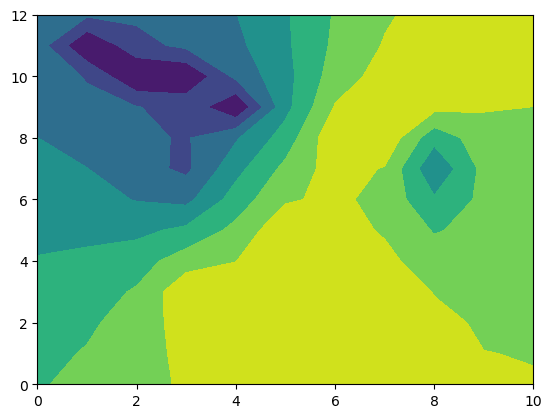

In [5]:
facedat = np.genfromtxt("face.csv", delimiter=",")
facedat
plt.contourf(facedat)
#left brow and both eyes negative
#right brow, nose and mouth positive

Result: As expected, the areas surrounding the charged pieces have a strong voltage marked in yellow. The locations of the grounded pieces can also be identified by darker blue colors where the voltage is weak. Once again, this makes sense because the grounded sources have 0 potential, so the potential energy of a positively charged particle in the surrounding area would be small.